##### Copyright 2019 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Convolutional Neural Networks

### Import TensorFlow

In [2]:

import tensorflow as tf

from tensorflow.keras import datasets, layers, models

E:\Continuum\anaconda3\envs\tf2\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
tf.__version__

'2.0.0-alpha0'

### Download and prepare the MNIST dataset

In [4]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

### Create the convolutional base

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [6]:
#add dense layer and softmax layer
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

 Here's the complete architecture of our model.

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

As you can see, our (3, 3, 64) outputs were flattened into vectors of shape (576) before going through two Dense layers.

### Compile and train the model

In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [9]:
model.fit(train_images, train_labels, epochs=1)

60000/60000 [==============================] - 170s 3ms/sample - loss: 0.1512 - accuracy: 0.9538 - loss: 0.1537 - accura - E


### Evaluate the model

In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 8s 791us/sample - loss: 0.0440 - accuracy: 0.9854 - - E - ETA: 2s - ETA: 0s -


In [11]:
print(test_acc)

0.9854


In [ ]:
#save the model

In [12]:
model.save('tf20cnnmodel1.h5')


In [ ]:
#Lets test this with some images

In [13]:
## prediction of single new data
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [26]:
test_image = np.expand_dims(test_images[300],axis = 0)

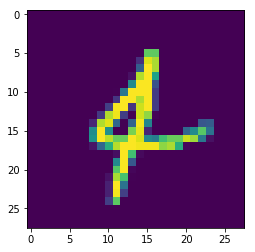

In [27]:
plt.imshow(test_image.reshape(28,28))

In [28]:
result = model.predict(test_image)

In [29]:
result

array([[9.7620341e-06, 8.8746747e-04, 1.1859658e-02, 1.7918574e-05,
        9.8690248e-01, 9.2381418e-07, 1.0857479e-04, 1.1467095e-04,
        6.0327093e-05, 3.8116537e-05]], dtype=float32)

In [30]:
result.argmax()

4

In [ ]:
#Thank you!